# Introduction
This project is to showcase me using the CRISP-DM(Cross-Industry Process for Data Mining)), which is a methodolgy that provides structure when planning for a data mining project, standard on the 2018 Stack Overflow Developers Survey 

CRISP-DM consists of 6 steps.

1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment


# Business understanding

For my analysis, I would like to take a further dive into the Stack Overflow Developers Survey dataset and understand the answers that my fellow Latinx/Black community gave in the survey

Questions that I would like to answer:

~~How many U.S. Latinx/Black participated in the Survey~~ ?

~~Which country had the highest of Latinx/Black participating in the Survey~~ ? 

Which type of education is prominent in the Latinx/Black community according to the survey ?

Which programming language is being used the most in the Latinx/Black community according to the survey ?

How many years did it take to learn how to code ? 


Columns that I will be analyzing in the dataset: 
```
'Country','Race','FormalEducation',
'YearsProgram',
'Professional',
'University','EmploymentStatus',
'EducationTypes', 
'DifficultCommunication','SelfTaughtTypes',
'IDE','HaveWorkedLanguage'
```


In [128]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [173]:
survey_data = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
column_of_interest = ['Country','Race','FormalEducation','YearsProgram','Professional','University','EmploymentStatus','EducationTypes',
'DifficultCommunication','SelfTaughtTypes','IDE','HaveWorkedLanguage']

In [163]:
def clean_multi_answers(df, index_name, column_name):
    answer_df = total_count(df, index_name, column_name)
    answer_df.set_index(index_name, inplace=True)
    return answer_df

def total_count(df, index_name, column_name):
    new_df = df[column_name].value_counts().reset_index()
    new_df.rename(columns={'index': index_name, column_name: 'count'}, inplace=True)
    counts = defaultdict(int)
    for answer in parse_multi_answer(df, column_name):
        for idx in range(new_df.shape[0]):
            developer_answers = [entry.strip() for entry in new_df[index_name][idx].split(";")]
            if answer in developer_answers:
                counts[answer] += int(new_df['count'][idx])
    counts = pd.DataFrame(pd.Series(counts)).reset_index()
    counts.columns = [index_name, 'count']
    counts.sort_values('count', ascending=False, inplace=True)
    return counts


def parse_multi_answer(df, column):
    answers = set()
    for idx in df[df[column].notnull()].index:
        for entry in df[column].iloc[idx].split(';'):
            answers.add(entry.strip())
    return answers

def plot_various_race_distribution(df):
    f, ax = plt.subplots(figsize=(7,5))
    races = list(df.index)[::-1]
    counts = df['count'].values[::-1]
    ax.barh(races, counts, 0.35, color='orange')
    ax.set_title("Different Races that filled out SOD survey")   
    plt.show()
    
def plot_latinx_black_distribution(df):
    f, ax = plt.subplots(figsize=(10,3))
    values_to_show = df.index.isin(['Hispanic or Latino/Latina', 'Black or of African descent'])
    races = list(df[values_to_show].index)[::-1]
    counts = df[values_to_show]['count'].values[::-1]
    ax.barh(races, counts, 0.35, color='red')
    ax.set_title('Latinx/Black participants that filled SOD survey') 
    plt.show()
    

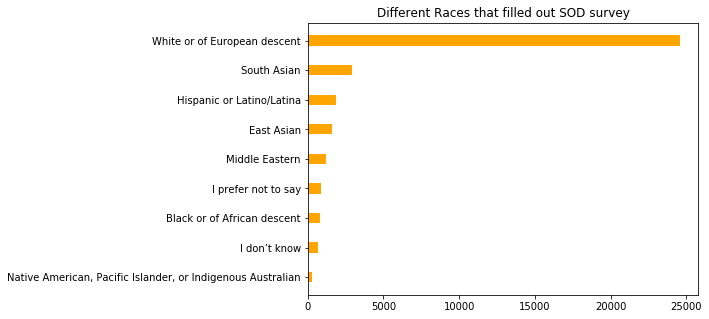

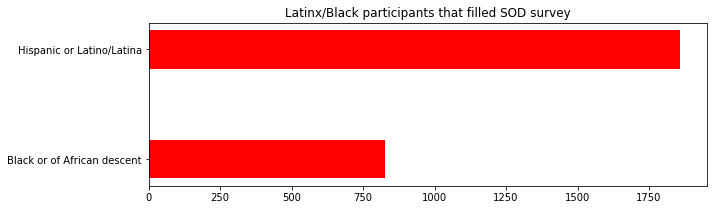

In [164]:
races_df = clean_multi_answers(survey_data, 'index_type', 'Race')
plot_various_race_distribution(races_df)
plot_latinx_black_distribution(races_df)

In [165]:
values = races_df.index.isin(['Hispanic or Latino/Latina', 'Black or of African descent'])
total = np.sum(races_df[values].values)
print("\n{} individuals reported as Latinx/Black participated in the Stack Overflow Developer survey".format(total))


2687 individuals reported as Latinx/Black participated in the Stack Overflow Developer survey


In [166]:
question2 = survey_data[column_of_interest]

In [167]:
def get_indexes_latinx_and_black(df):
    indexes = []
    for idx in range(df.shape[0]):
        try:
            developer_races = [race_entry.strip() for race_entry in df['Race'][idx].split(";")]
            if 'Hispanic or Latino/Latina' in developer_races or 'Black or of African descent' in developer_races:
                indexes.append(idx)
        except:
            continue
    return indexes

def get_indexes_latinx(df):
    indexes = []
    for idx in range(df.shape[0]):
        try:
            developer_races = [race_entry.strip() for race_entry in df['Race'][idx].split(";")]
            if 'Hispanic or Latino/Latina' in developer_races and not 'Black or of African descent' in developer_races:
                indexes.append(idx)
        except:
            continue
    return indexes

def get_indexes_black(df):
    indexes = []
    for idx in range(df.shape[0]):
        try:
            developer_races = [race_entry.strip() for race_entry in df['Race'][idx].split(";")]
            if 'Black or of African descent' in developer_races and not 'Hispanic or Latino/Latina' in developer_races:
                indexes.append(idx)
        except:
            continue
    return indexes

def get_indexes_nonlatinx_and_nonblack(df):
    indexes = []
    for idx in range(df.shape[0]):
        try:
            developer_races = [race_entry.strip() for race_entry in df['Race'][idx].split(";")]
            if 'Hispanic or Latino/Latina' in developer_races or 'Black or of African descent' in developer_races:
                continue
            indexes.append(idx)
        except:
            continue
    return indexes

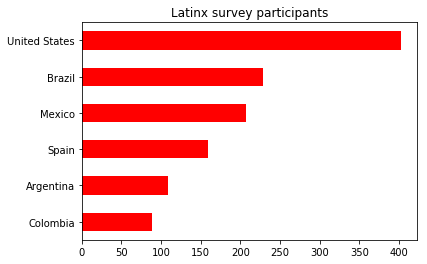

In [168]:
#Latinx survey participants
df = survey_data.loc[get_indexes_latinx(question2),:].reset_index()
df['Country'].value_counts()[:6][::-1].plot(kind="barh", 
                                             title="Latinx survey participants",
                                             color="red")

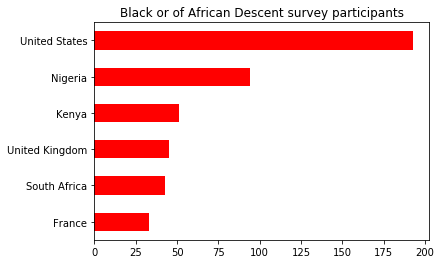

In [169]:
#Black or of African Descent survey participants
df = survey_data.loc[get_indexes_black(question2),:].reset_index()
ax = df['Country'].value_counts()[:6][::-1].plot(kind="barh", 
                                                  title="Black or of African Descent survey participants",
                                                  color="red")

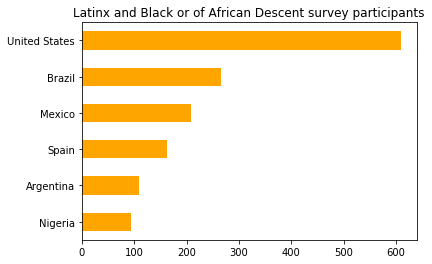

In [170]:
#Both Latinx and Black/African Descent
df = survey_data.loc[get_indexes_latinx_and_black(question2),:].reset_index()
df['Country'].value_counts()[:6][::-1].plot(kind="barh", 
                                             title="Latinx and Black or of African Descent survey participants",
                                             color="orange")

In [174]:
question3 = survey_data[column_of_interest]

In [176]:
rebuttle_question3 = survey_data[column_of_interest]

In [177]:
question3 = survey_data.loc[get_indexes_latinx_and_black(question3), :].reset_index()

In [178]:
rebuttle_question3 = survey_data.loc[get_indexes_nonlatinx_and_nonblack(rebuttle_question3), :].reset_index()

In [201]:
question3['FormalEducation'].value_counts()

Bachelor's degree                                                    1201
Some college/university study without earning a bachelor's degree     563
Master's degree                                                       369
Secondary school                                                      274
Professional degree                                                    76
Doctoral degree                                                        51
Primary/elementary school                                              35
I prefer not to answer                                                 32
I never completed any formal education                                 11
Name: FormalEducation, dtype: int64

In [199]:
rebuttle_question3['FormalEducation'].value_counts()

Bachelor's degree                                                    12876
Master's degree                                                       6983
Some college/university study without earning a bachelor's degree     4991
Secondary school                                                      3308
Doctoral degree                                                        855
Primary/elementary school                                              526
I prefer not to answer                                                 387
Professional degree                                                    324
I never completed any formal education                                 171
Name: FormalEducation, dtype: int64

In [181]:
print("Education Type for latinx/black survey pariticipants")
print(clean_multi_answers(question3, 'education_type', 'EducationTypes'))

Education Type for latinx/black survey pariticipants
                           count
education_type                  
Self-taught                 1742
Online course               1142
On-the-job training          772
Open source contributions    659
Hackathon                    499
Coding competition           471
Part-time/evening course     426
Industry certification       318
Bootcamp                     199


In [182]:
print("Education Type for non latinx/black survey pariticipants")
print(clean_multi_answers(rebuttle_question3, 'education_type', 'EducationTypes'))

Education Type for Non latinx/black survey pariticipants
                           count
education_type                  
Self-taught                20486
Online course               9888
On-the-job training         9421
Open source contributions   8769
Hackathon                   5325
Coding competition          4899
Industry certification      3236
Part-time/evening course    3054
Bootcamp                    1846


In [198]:
print("Coding Language for non latinx/black survey pariticipants")
print(clean_multi_answers(rebuttle_question3, 'code_type', 'HaveWorkedLanguage')[:5])

Coding Language for non latinx/black survey pariticipants
            count
code_type        
JavaScript  18710
SQL         15346
Java        11700
C#          10307
Python       9614


In [231]:
print("Coding Language for latinx/black survey pariticipants")
print(clean_multi_answers(question3, 'code_type', 'HaveWorkedLanguage')[:5])

Coding Language for latinx/black survey pariticipants
            count
code_type        
JavaScript   1726
SQL          1379
Java         1112
PHP           831
C#            830


In [227]:
question3['Professional'].value_counts().sum()

2612

In [226]:
rebuttle_question3['Professional'].value_counts().sum()

30421

In [224]:
question3['YearsProgram'].value_counts().sum()

2612

In [225]:
rebuttle_question3['YearsProgram'].value_counts().sum()

30392

In [212]:
question3['FriendsDevelopers'].value_counts()

Disagree             566
Somewhat agree       549
Agree                407
Strongly disagree    221
Strongly agree       204
Name: FriendsDevelopers, dtype: int64

In [213]:
rebuttle_question3['FriendsDevelopers'].value_counts()

Disagree             7084
Somewhat agree       5668
Agree                5293
Strongly disagree    2350
Strongly agree       1977
Name: FriendsDevelopers, dtype: int64

In [217]:
print(clean_multi_answers(question3, 'teach_type', 'SelfTaughtTypes'))

                              count
teach_type                         
Official documentation         1422
Stack Overflow Q&A             1388
Trade book                     1016
Non-Stack online communities    898
Built-in help                   765
Stack Overflow Docs             561
Textbook                        424
Company internal community      351
Friends network                 339
Other                           209
Tutoring/mentoring               89


In [218]:
print(clean_multi_answers(rebuttle_question3, 'teach_type', 'SelfTaughtTypes'))

                              count
teach_type                         
Official documentation        16708
Stack Overflow Q&A            16625
Trade book                    10918
Non-Stack online communities  10297
Built-in help                  9871
Stack Overflow Docs            5277
Friends network                4266
Textbook                       4027
Company internal community     3574
Other                          2458
Tutoring/mentoring              830


In [246]:
print(clean_multi_answers(question3, 'teach_type', 'IDE')[:7])

                count
teach_type           
Sublime Text      957
Visual Studio     913
Notepad++         821
Vim               673
Android Studio    608
Atom              607
Eclipse           602


In [245]:
print(clean_multi_answers(rebuttle_question3, 'teach_type', 'IDE')[:7])

                    count
teach_type               
Visual Studio       11436
Notepad++           10540
Vim                  8191
Sublime Text         7944
Eclipse              6350
IntelliJ             6130
Visual Studio Code   5649


In [232]:
question3['HighestEducationParents'].value_counts()

A bachelor's degree                                    844
Some college/university study, no bachelor's degree    460
A master's degree                                      386
High school                                            366
A professional degree                                  157
Primary/elementary school                              152
A doctoral degree                                      137
No education                                            35
I don't know/not sure                                   32
I prefer not to answer                                  22
Name: HighestEducationParents, dtype: int64

In [233]:
rebuttle_question3['HighestEducationParents'].value_counts()

A bachelor's degree                                    8644
A master's degree                                      6733
High school                                            5188
Some college/university study, no bachelor's degree    4097
A doctoral degree                                      1823
A professional degree                                  1324
Primary/elementary school                              1108
I don't know/not sure                                   648
I prefer not to answer                                  506
No education                                            152
Name: HighestEducationParents, dtype: int64

In [241]:
print("Median Annual Base Salary: {}".format(np.median(question3[question3['Salary'].notnull()]['Salary'])))
print("Average Annual Base Salary: {}".format(np.mean(question3[question3['Salary'].notnull()]['Salary'])))
print("Standard Deviation Annual Base Salary: {}".format(np.std(question3[question3['Salary'].notnull()]['Salary'])))

Median Annual Base Salary: 37817.20430107525
Average Annual Base Salary: 47914.20977256485
Standard Deviation Annual Base Salary: 40457.677937222936


In [242]:
print("Median Annual Base Salary: {}".format(np.median(rebuttle_question3[rebuttle_question3['Salary'].notnull()]['Salary'])))
print("Average Annual Base Salary: {}".format(np.mean(rebuttle_question3[rebuttle_question3['Salary'].notnull()]['Salary'])))
print("Standard Deviation Annual Base Salary: {}".format(np.std(rebuttle_question3[rebuttle_question3['Salary'].notnull()]['Salary'])))

Median Annual Base Salary: 52500.0
Average Annual Base Salary: 58587.48891167357
Standard Deviation Annual Base Salary: 39438.69499326545


In [243]:
question3['ProgramHobby'].value_counts()

Yes, I program as a hobby                    1194
Yes, both                                     765
No                                            499
Yes, I contribute to open source projects     154
Name: ProgramHobby, dtype: int64

In [244]:
rebuttle_question3['ProgramHobby'].value_counts()

Yes, I program as a hobby                    14836
Yes, both                                     8524
No                                            5354
Yes, I contribute to open source projects     1707
Name: ProgramHobby, dtype: int64